<a href="https://colab.research.google.com/github/MiladQolami/Mathematical-tools-for-neuroscience/blob/main/Machine_Learning/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction 

Imagine that you are a scientist and during a biological experiment you hypothesize that there might be a meaningful relationship between mice's weight and drug dosage that you had injected them. The first step is to collect some data and plot them to see how they might be related. 

Let's generate some data for this scenario.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

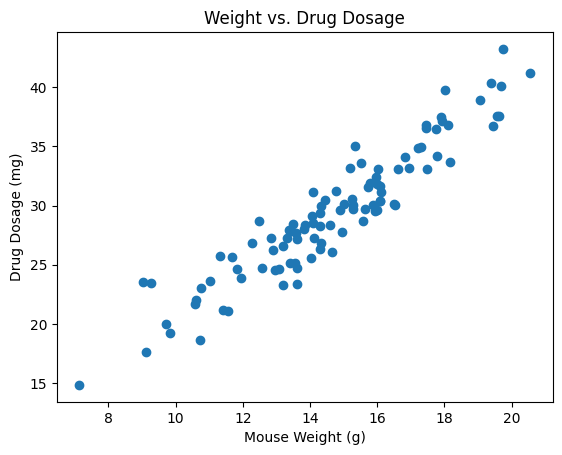

In [102]:

# Set a random seed for reproducibility
np.random.seed(42)

# Generate random drug_dosage (in miligrams)
drug_dosages = np.random.normal(15, 3, 100)

# Generate wights (in g) based on a linear relationship with some added noise (in fact we dont know this relatoinship)
weights = 2 * drug_dosages + np.random.normal(0, 2, 100)

# Create a scatter plot of the data
plt.scatter(drug_dosages, weights)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Drug Dosage (mg)')
plt.title('Weight vs. Drug Dosage')
plt.show()

By looking at the data you might guess the relationship between these two variables is linear. We can formulaize this relationship in mathematical notation:

$$\mathbf{X}\boldsymbol{\beta} = \mathbf{y}$$

where $X$ is called design matix, its columns are independent variables (here drug dosage), $\beta$ is called regression coefficints and $y$ is true data ore observed data.

In reality our prediction is almost always deviated from true or observed data so a more precise equation is:

$$\mathbf{X}\boldsymbol{\beta} = \mathbf{y} + \mathbf{ϵ}$$

where $ϵ$ is the error of our model and the goal is to minimize that error:

$$\mathbf{ϵ} =  \mathbf{y} - \mathbf{X}\boldsymbol{\beta}  $$

Because this errors are some times positive and some times negateve the sum of the erros might be clsoe to zero which does not mean the amount of error is low. One possible solution for this is taking squre of these errors and minimizing that:

$$\min_{\beta} \sum_{i=1}^n (\mathbf{y} - \mathbf{X}\boldsymbol{\beta})^2$$
<br>
<br>
<p align='Center'>
 <img src="https://upload.wikimedia.org/wikipedia/commons/b/b0/Linear_least_squares_example2.svg" alt="Cute Cat" />
</div>

There are several ways to find β. We skip drivation and show final formula in linear algebra notaoin. 

$$\boldsymbol{\beta} = (\mathbf{X}^{\mathrm{T}}\mathbf{X})^{-1}\mathbf{X}^{\mathrm{T}}\mathbf{y}$$

**Exercise1**

Write a code to find  $\beta$ for data in previous section using.

In [103]:
# code

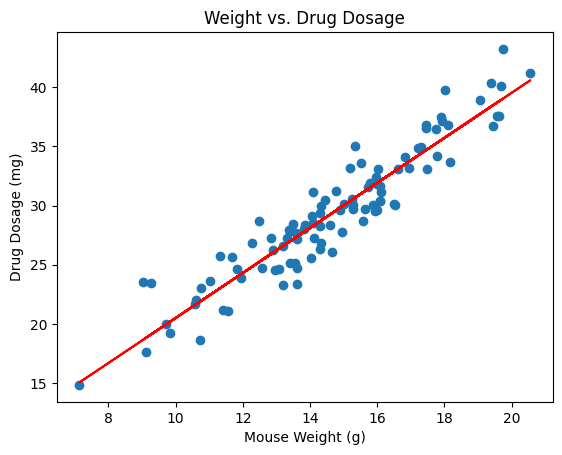

In [104]:
from numpy.core.multiarray import dtype
#@markdown Solution

# First, we need to set up the design matrix
design_mat = np.hstack((np.ones((len(weights), 1), dtype=np.float64), drug_dosages.reshape(-1, 1)))

beta = np.linalg.inv((design_mat.T @ design_mat)) @ design_mat.T @ weights

weights_pred = beta[0] + beta[1] * drug_dosages  # Predicted drug dosages

plt.scatter( drug_dosages,weights)
plt.plot(drug_dosages,weights_pred,  'r-')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Drug Dosage (mg)')
plt.title('Weight vs. Drug Dosage')
plt.show()


## Using Built-in functions
___
There are libraries in python that contian built-in functions for fitting models including linear regression. The most famous one is sklearn. Here we show how to use this library to fit linear regression.


In [105]:
from sklearn.linear_model import LinearRegression

# Frist we need to turn predictor variables into 2D
X  = drug_dosages.reshape(-1,1)


In [106]:
# Instantiate the LinearRegression class

linModel = LinearRegression()

# Fit the model
linModel.fit(X,weights)

LinearRegression()

In [107]:
# Get the coefficients and intercept
coef = linModel.coef_
intercept = linModel.intercept_

print("Coefficient:", coef)
print("Intercept:", intercept)


Coefficient: [1.90449523]
Intercept: 1.4474272624423534


In [76]:
# Make predictions using the model
weiths_pred_sk = linModel.predict(X)


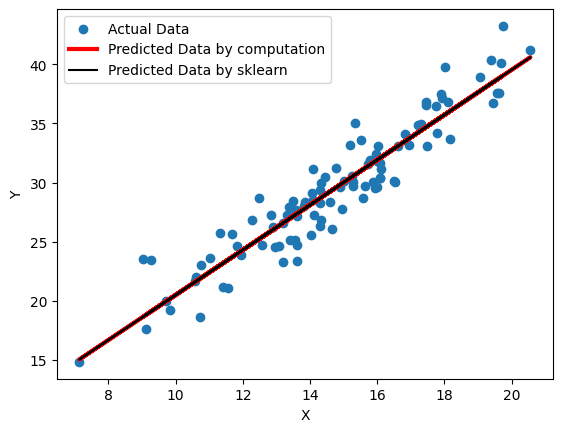

In [108]:
# Create a scatter plot of the actual data
plt.scatter(drug_dosages, weights, label='Actual Data')


plt.plot(drug_dosages,weights_pred,  'r',label='Predicted Data by computation',linewidth = 3)

# Plot the predicted data (the regression line)
plt.plot(drug_dosages, weiths_pred_sk, 'k', label='Predicted Data by sklearn')


# Add labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Show the plot
plt.show()


As you can see both lines are exactly the same.